## Using features extracted from intensity profiles


In [ ]:
!pip install adjustText

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.ensemble import IsolationForest
from adjustText import adjust_text

In [ ]:
import matplotlib.pylab as pylab
params = {
    'font.size': 12,
    'legend.fontsize':'large',
    'figure.titlesize':'large',
    'axes.grid':False,
    'axes.labelsize':'large',
    'axes.titlesize':'large',
    'xtick.labelsize':'large',
    'ytick.labelsize':'large',
    #'figure.figsize': (5, 6)
    }
pylab.rcParams.update(params)

In [ ]:
# file_name = 'experimental data - attributes.xlsx'
# sheet_name = 'all plaques'
# n_rows = 153
# data = 'experiment'

# file_name = 'S1.xlsx'
# sheet_name = 'attributes'
# n_rows = 40
# data = 'toy-similar'

# file_name = 'S2.xlsx'
# sheet_name = 'attributes'
# n_rows = 40
# data = 'toy-similar'

file_name = 'S3.xlsx'
sheet_name = 'attributes'
n_rows = 56
data = 'toy-dissimilar'

if data == 'experiment': # plaques 1-8
    marker_map = {
        range(0, 20): ('*', 'black'),
        range(20, 34): ('o', 'blue'),
        range(34, 49): ('<', 'green'),
        range(49, 73): ('D', 'red'),
        range(73, 86): ('X', 'cyan'),
        range(86, 94): ('s', 'magenta'),
        range(94, 117): ('^', 'gray'),
        range(117, len(scaled_data)): ('p', 'purple')
        }
    round_one_cells = [0, 20, 34, 49, 73, 86, 94, 117]
elif data == 'toy-similar': # similar toy data
    marker_map = {
        range(0, 10): ('*', 'black'),
        range(10, 20): ('o', 'blue'),
        range(20, 30): ('<', 'green'),
        range(30, 40): ('D', 'red')
        }
    round_one_cells = [0, 10, 20, 30]

elif data =='toy-dissimilar': # dissimilar toy data
    marker_map = {
        range(0, 11): ('*', 'black'),
        range(11, 24): ('o', 'blue'),
        range(24, 31): ('<', 'green'),
        range(31, 37): ('D', 'red'),
        range(37, 47): ('X', 'cyan'),
        range(47, 56): ('s', 'magenta')
        }
    round_one_cells = [0, 11, 24, 31, 37, 47]

In [ ]:
attributes_df = pd.read_excel(file_name, sheet_name, nrows=n_rows)
attributes_df = attributes_df.drop(labels=['Unnamed: 0', 'Cell #', 'Plaque', 'Cell ID'], axis=1)
indices = ['GFP max', 'Infection time', 'Rise time', 'Lysis time', 'Infection duration', 'Rise rate', 'Area']
scaled_data = StandardScaler().fit_transform(attributes_df)
#pd.DataFrame(scaled_data, columns=attributes_df.columns)

In [ ]:
model = IsolationForest(contamination=0.1)  # Adjust contamination parameter based on expected anomaly rate
model.fit(scaled_data)
results_df = pd.read_excel(file_name, sheet_name, nrows=n_rows)
results_df['Results'] = model.predict(scaled_data)
# results_df['Results'] = results_df['Results'].map({1: 'Normal', -1: 'Anomaly'})
print(results_df['Results'].value_counts())

Results
 1    50
-1     6
Name: count, dtype: int64


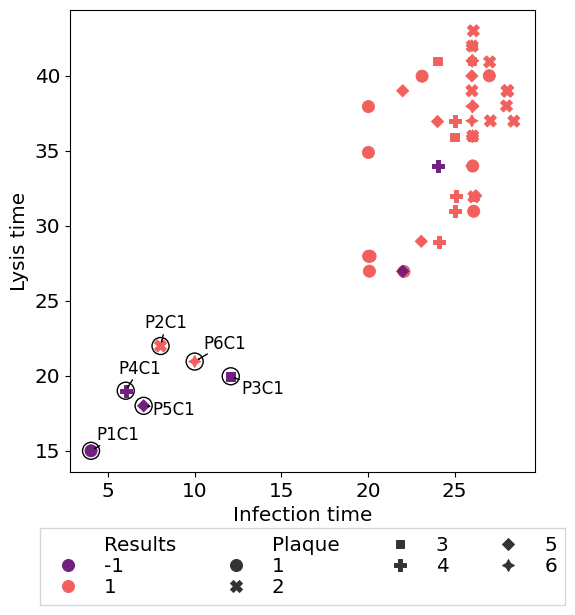

In [ ]:
x_axis='Infection time'
y_axis='Lysis time'

fig, ax = plt.subplots(figsize=(6, 6))
annot = []
xs = []
ys = []
texts = []
unique_clusters = results_df['Results'].unique()
num_clusters = len(unique_clusters)
color_palette = sns.color_palette('magma', num_clusters)
ax = sns.scatterplot(x=x_axis, y=y_axis, data=results_df, style='Plaque', s=75, ec=None, hue='Results', palette=color_palette)

for round_one_cell in round_one_cells:
    xs.append(results_df[x_axis].loc[round_one_cell])
    ys.append(results_df[y_axis].loc[round_one_cell])
    annot.append(f'P{round_one_cells.index(round_one_cell) + 1}C1')
    ax.scatter(results_df[x_axis].loc[round_one_cell], results_df[y_axis].loc[round_one_cell], s=150, facecolors='none',
                edgecolors='k')
for x, y, s in zip(xs, ys, annot):
    texts.append(plt.text(x, y, s))
ax.set_xlabel(x_axis)
ax.set_ylabel(y_axis)
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, expand=(1.2, 2), arrowprops=dict(arrowstyle="->", color='k', lw=1.))
plt.legend(loc='upper center', labelspacing=0.1, bbox_to_anchor=(0.5, -0.1), ncol=4, fancybox=False, shadow=False)
plt.show()